<a href="https://colab.research.google.com/github/Rakesh-kumar-s/Rakesh-kumar-s/blob/main/Deep_spectral_unmixing_for_Quantitative_analysis_of_polymer_blends_using_FTIR_AND_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Ml Project

#Load Data

In [6]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Check the uploaded file name
import pandas as pd

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Read the CSV, skipping the first 3 rows
df = pd.read_csv(file_name, skiprows=3)

# The first row is the actual header, so set it as column names and drop it
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Convert the 'cm-1' column to numeric, coercing errors
df['cm-1'] = pd.to_numeric(df['cm-1'], errors='coerce')


print("Successfully read and processed the CSV:")
display(df.head())

Saving merge-csv.com__68b7b6e79ae46.csv to merge-csv.com__68b7b6e79ae46.csv
Successfully read and processed the CSV:


,cm-1,%T,NaN
0,4000.0,102.05,NaN
1,3999.0,102.04,NaN
2,3998.0,102.03,NaN
3,3997.0,102.02,NaN
4,3996.0,102.02,NaN


# Data Preparation

# Data Separation as X and Y

In [7]:
# Separate features (X) and target (y)
X = df[['cm-1']]
y = df['%T']

print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Features (X):


,cm-1
0,4000.0
1,3999.0
2,3998.0
3,3997.0
4,3996.0



Target (y):


,%T
0,102.05
1,102.04
2,102.03
3,102.02
4,102.02


In [8]:
# Convert the target variable 'y' to numeric, coercing errors to NaN
y = pd.to_numeric(y, errors='coerce')

print("Converted target variable (y):")
display(y.head())

Converted target variable (y):


,%T
0,102.05
1,102.04
2,102.03
3,102.02
4,102.02


## Data splitting

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,cm-1
6108,1394.0
11343,3163.0
18734,2776.0
19290,2220.0
8487,2517.0
...,...
11284,3222.0
11964,2542.0
5390,2112.0
860,3140.0


In [11]:
X_test

,cm-1
17632,3878.0
14450,3558.0
2301,1699.0
6095,1407.0
13039,1467.0
...,...
11275,3231.0
6422,1080.0
10454,550.0
10780,3726.0


In [12]:
y_train

,%T
6108,98.96
11343,101.81
18734,92.00
19290,99.73
8487,102.60
...,...
11284,101.62
11964,102.05
5390,100.94
860,101.00


In [13]:
y_test

,%T
17632,101.43
14450,101.85
2301,99.14
6095,99.06
13039,91.36
...,...
11275,101.60
6422,98.12
10454,88.09
10780,102.75


# Model Building

# Linear Regression

## Traning the model

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_cleaned, y_train_cleaned)

LinearRegression()

Applying the model to make prediction

In [27]:
y_lr_train_pred = lr.predict(X_train_cleaned)
y_lr_test_pred = lr.predict(X_test_cleaned)

In [28]:
y_lr_train_pred


array([96.55519178, 99.9100867 , 99.17614417, ..., 97.91687327,
       99.86646738, 98.108419  ])

In [29]:
y_lr_test_pred


array([101.26607871, 100.65920117,  97.13362194, ...,  94.95455226,
       100.97781188,  98.11979795])

Evaluate Model Performance

In [30]:
y_train

,%T
6108,98.96
11343,101.81
18734,92.00
19290,99.73
8487,102.60
...,...
11284,101.62
11964,102.05
5390,100.94
860,101.00


In [34]:
y_lr_train_pred

array([96.55519178, 99.9100867 , 99.17614417, ..., 97.91687327,
       99.86646738, 98.108419  ])

# Evaluate Model Performance

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train_cleaned, y_lr_train_pred)
lr_train_r2 = r2_score(y_train_cleaned, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test_cleaned, y_lr_test_pred)
lr_test_r2 = r2_score(y_test_cleaned, y_lr_test_pred)

In [52]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)


LR MSE (Train):  36.70220475065342
LR R2 (Train):  0.0906405725863586
LR MSE (Test):  33.58763623226075
LR R2 (Test):  0.09986500630609052


In [53]:
lr_results= pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [54]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,36.702205,0.090641,33.587636,0.099865


## Random Forest

# Traning the model

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_cleaned, y_train_cleaned)

RandomForestRegressor(random_state=42)

# Applying the model to make prediction

In [57]:
y_rf_train_pred = rf.predict(X_train_cleaned)
y_rf_test_pred = rf.predict(X_test_cleaned)

# Evaluate Model Performance

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train_cleaned, y_rf_train_pred)
rf_train_r2 = r2_score(y_train_cleaned, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test_cleaned, y_rf_test_pred)
rf_test_r2 = r2_score(y_test_cleaned, y_rf_test_pred)

In [60]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,24.372778,0.396123,33.979408,0.089366


# Model Comparision

In [61]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,36.702205,0.090641,33.587636,0.099865
1,Random Forest,24.372778,0.396123,33.979408,0.089366


In [62]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,36.702205,0.090641,33.587636,0.099865
1,Random Forest,24.372778,0.396123,33.979408,0.089366


# Data Visualtion of Prediction Results

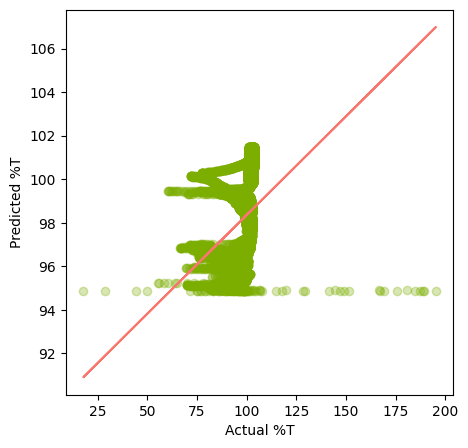

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(y_train_cleaned, y_lr_train_pred, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train_cleaned, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train_cleaned, p(y_train_cleaned), '#F8766D')
plt.ylabel('Predicted %T')
plt.xlabel('Actual %T')
plt.show()